<a href="https://colab.research.google.com/github/Abubakar-6818/exercise_submissions/blob/main/extras/exercises/02_pytorch_classification_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Arewa Data Science Academy**
## Deep Learning Cohort 2.0

Name: Abubakar Abubakar Al-amin

Email: abubakaralamin100@gmail.com

Title: Week 3 Solution

Exercises Solution

# 02. PyTorch Classification Exercises

The following is a template for 02. PyTorch Classification exercises.

It's only starter code and it's your job to fill in the blanks.

Because of the flexibility of PyTorch, there may be more than one way to answer the question.

Don't worry about trying to be *right* just try writing code that suffices the question.

## Resources
* These exercises are based on [notebook 02 of the learn PyTorch course](https://www.learnpytorch.io/02_pytorch_classification/).
* You can see one form of [solutions on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions) (but try the exercises below yourself first!).

In [1]:
# Import torch
import torch

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

# Setup random seed
RANDOM_SEED = 42

## 1. Make a binary classification dataset with Scikit-Learn's [`make_moons()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function.
  * For consistency, the dataset should have 1000 samples and a `random_state=42`.
  * Turn the data into PyTorch tensors.
  * Split the data into training and test sets using `train_test_split` with 80% training and 20% testing.

In [8]:
# Create a dataset with Scikit-Learn's make_moons()
from sklearn.datasets import make_moons

X, y = make_moons(1000,

                    random_state=RANDOM_SEED)

In [10]:
# Turn data into a DataFrame
import pandas as pd

data =  pd.DataFrame({"X1": X[:, 0],
    "X2": X[:, 1],
    "label": y
})
data.head()

,X1,X2,label
0,0.008727,0.368174,1
1,0.921384,-0.496905,1
2,0.940226,-0.498212,1
3,0.465875,-0.345406,1
4,-0.850412,0.526117,0


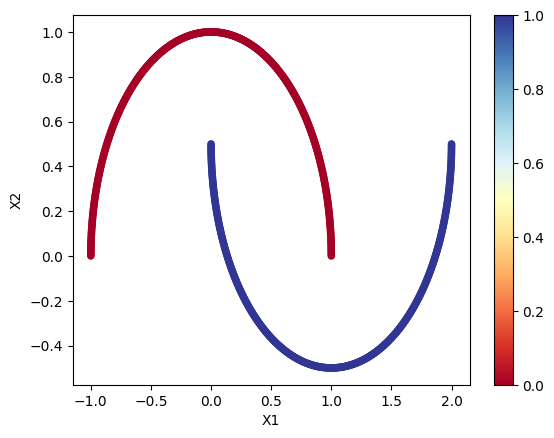

In [11]:
# Visualize the data on a scatter plot
import matplotlib.pyplot as plt
data.plot(kind="scatter", x=0, y=1, c=datasets[1], cmap="RdYlBu")
plt.show()

In [25]:
# Turn data into tensors of dtype float
X = torch.from_numpy(X).type(torch.float) # features as float32
y = torch.from_numpy(y).type(torch.LongTensor) # labels need to be of type long

# Split the data into train and test sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=42) # make the random split reproducible

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Build a model by subclassing `nn.Module` that incorporates non-linear activation functions and is capable of fitting the data you created in 1.
  * Feel free to use any combination of PyTorch layers (linear and non-linear) you want.

In [13]:
import torch
from torch import nn

# Inherit from nn.Module to make a model capable of fitting the mooon data
class MoonModelV0(nn.Module):
    ## Your code here ##
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()




    def forward(self, x):
        x  = self.layer_1(x)
        x = self.relu(x)
        x = self.layer_2(x)
        x = self.relu(x)
        x = self.layer_3(x)
        x = self.sigmoid(x)
        return x

# Instantiate the model
## Your code here ##
model_0 = MoonModelV0()
model_0

MoonModelV0(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
)

## 3. Setup a binary classification compatible loss function and optimizer to use when training the model built in 2.

In [30]:
# Setup loss function
loss_fn = nn.BCEWithLogitsLoss()
# Setup optimizer to optimize model's parameters

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.1
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

## 4. Create a training and testing loop to fit the model you created in 2 to the data you created in 1.
  * Do a forward pass of the model to see what's coming out in the form of logits, prediction probabilities and labels.
  * To measure model accuray, you can create your own accuracy function or use the accuracy function in [TorchMetrics](https://torchmetrics.readthedocs.io/en/latest/).
  * Train the model for long enough for it to reach over 96% accuracy.
  * The training loop should output progress every 10 epochs of the model's training and test set loss and accuracy.

In [26]:
# What's coming out of our model?
output =model_0(X_train[:, :2])
print("Model Output :", output[:5])

# logits (raw outputs of model)
logits = model_0(X_train[:, :2])
print("Logits:", logits[:5])
## Your code here ##

# Prediction probabilities
print("Pred probs:")
prob = torch.sigmoid(logits)
print(prob[:5])
## Your code here ##

# Prediction labels
print("Pred labels:")
pred = torch.round(prob)
print(pred[:5])
## Your code here ##

Model Output : tensor([[0.6152],
        [0.6168],
        [0.6241],
        [0.6240],
        [0.6063]], grad_fn=<SliceBackward0>)
Logits: tensor([[0.6152],
        [0.6168],
        [0.6241],
        [0.6240],
        [0.6063]], grad_fn=<SliceBackward0>)
Pred probs:
tensor([[0.6491],
        [0.6495],
        [0.6511],
        [0.6511],
        [0.6471]], grad_fn=<SliceBackward0>)
Pred labels:
tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]], grad_fn=<SliceBackward0>)


In [20]:
# Let's calculuate the accuracy using accuracy from TorchMetrics
!pip -q install torchmetrics # Colab doesn't come with torchmetrics
from torchmetrics import Accuracy

## TODO: Uncomment this code to use the Accuracy function
acc_fn = Accuracy(task="multiclass", num_classes=2).to(device) # send accuracy function to device
acc_fn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 931.6/931.6 kB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 65.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 76.6 MB/s eta 0:00:00


MulticlassAccuracy()

In [37]:
from torchmetrics.classification import BinaryAccuracy

acc_fn = BinaryAccuracy().to(device)  # Use BinaryAccuracy for binary classification


In [39]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Convert targets to float
y_train = y_train.to(torch.float)
y_test = y_test.to(torch.float)


# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_0.train()

    # 1. Forward pass (model outputs raw logits)
    y_logits = model_0(X_train).squeeze() # squeeze to remove extra `1` dimensions, this won't work unless model and data are on same device
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labls

    # 2. Calculate loss/accuracy
    # loss = loss_fn(torch.sigmoid(y_logits), # Using nn.BCELoss you need torch.sigmoid()
    #                y_train)
    loss = loss_fn(y_logits, # Using nn.BCEWithLogitsLoss works with raw logits
                   y_train)
    acc = acc_fn(y_pred, y_train)
    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_0.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)

        test_acc = acc_fn(test_pred, y_test)



    # Print out what's happening every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.74165, Accuracy: 0.50% | Test loss: 0.74139, Test acc: 0.50%
Epoch: 10 | Loss: 0.73880, Accuracy: 0.50% | Test loss: 0.73857, Test acc: 0.50%
Epoch: 20 | Loss: 0.73618, Accuracy: 0.50% | Test loss: 0.73600, Test acc: 0.50%
Epoch: 30 | Loss: 0.73379, Accuracy: 0.50% | Test loss: 0.73366, Test acc: 0.50%
Epoch: 40 | Loss: 0.73161, Accuracy: 0.50% | Test loss: 0.73152, Test acc: 0.50%
Epoch: 50 | Loss: 0.72960, Accuracy: 0.50% | Test loss: 0.72956, Test acc: 0.50%
Epoch: 60 | Loss: 0.72772, Accuracy: 0.50% | Test loss: 0.72773, Test acc: 0.50%
Epoch: 70 | Loss: 0.72596, Accuracy: 0.50% | Test loss: 0.72601, Test acc: 0.50%
Epoch: 80 | Loss: 0.72427, Accuracy: 0.50% | Test loss: 0.72436, Test acc: 0.50%
Epoch: 90 | Loss: 0.72264, Accuracy: 0.50% | Test loss: 0.72277, Test acc: 0.50%


## 5. Make predictions with your trained model and plot them using the `plot_decision_boundary()` function created in this notebook.

In [40]:
# Plot the model predictions
import numpy as np

def plot_decision_boundary(model, X, y):

    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Source - https://madewithml.com/courses/foundations/neural-networks/
    # (with modifications)
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101),
                         np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits)) # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

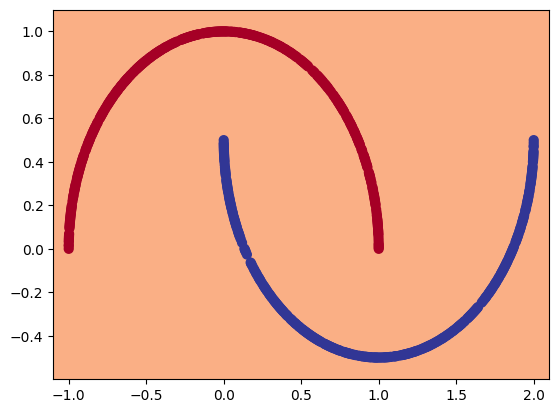

In [41]:
# Plot decision boundaries for training and test sets
plot_decision_boundary(model_0, X_train, y_train)

## 6. Replicate the Tanh (hyperbolic tangent) activation function in pure PyTorch.
  * Feel free to reference the [ML cheatsheet website](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html#tanh) for the formula.

In [42]:
# Create a straight line tensor
line_tensor = torch.arange(-10, 10, 1)
line_tensor

tensor([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,   3,
          4,   5,   6,   7,   8,   9])

In [43]:
# Test torch.tanh() on the tensor and plot it
line_tensor_tanh = torch.tanh(line_tensor)
line_tensor_tanh


tensor([-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9999, -0.9993, -0.9951,
        -0.9640, -0.7616,  0.0000,  0.7616,  0.9640,  0.9951,  0.9993,  0.9999,
         1.0000,  1.0000,  1.0000,  1.0000])

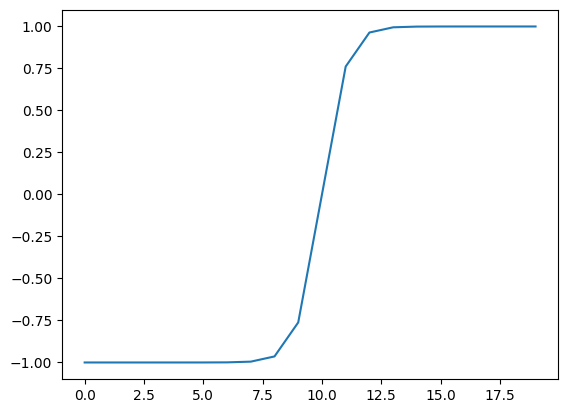

In [46]:
# Replicate torch.tanh() and plot it
replicate_tanh = (torch.exp(line_tensor) - torch.exp(-line_tensor)) / (torch.exp(line_tensor) + torch.exp(-line_tensor))
plt.plot(replicate_tanh)

## 7. Create a multi-class dataset using the [spirals data creation function from CS231n](https://cs231n.github.io/neural-networks-case-study/) (see below for the code).
  * Split the data into training and test sets (80% train, 20% test) as well as turn it into PyTorch tensors.
  * Construct a model capable of fitting the data (you may need a combination of linear and non-linear layers).
  * Build a loss function and optimizer capable of handling multi-class data (optional extension: use the Adam optimizer instead of SGD, you may have to experiment with different values of the learning rate to get it working).
  * Make a training and testing loop for the multi-class data and train a model on it to reach over 95% testing accuracy (you can use any accuracy measuring function here that you like) - 1000 epochs should be plenty.
  * Plot the decision boundaries on the spirals dataset from your model predictions, the `plot_decision_boundary()` function should work for this dataset too.

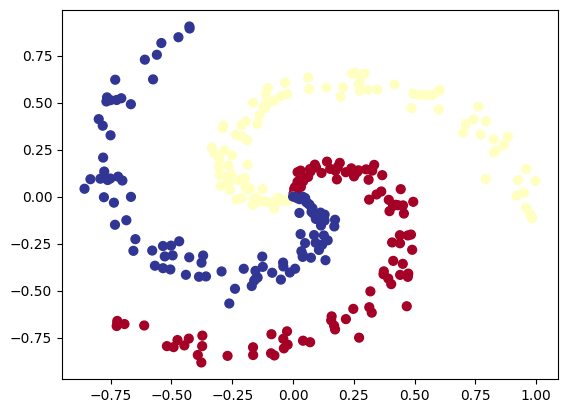

In [47]:
# Code for creating a spiral dataset from CS231n
import numpy as np
import matplotlib.pyplot as plt
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
plt.show()

In [48]:
# Turn data into tensors
import torch
X = torch.from_numpy(X).type(torch.float) # features as float32
y = torch.from_numpy(y).type(torch.LongTensor) # labels need to be of type long

# Create train and test splits
from sklearn.model_selection import train_test_split


In [49]:
# Let's calculuate the accuracy for when we fit our model
!pip -q install torchmetrics # colab doesn't come with torchmetrics
from torchmetrics import Accuracy

## TODO: uncomment the two lines below to send the accuracy function to the device
acc_fn = Accuracy(task="multiclass", num_classes=4).to(device)
acc_fn

MulticlassAccuracy()

In [59]:
# Prepare device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

class MultiClassModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.non_linear = nn.ReLU()
        self.layer_3 = nn.Linear(in_features=10, out_features=3)  # 3 output classes

    def forward(self, x):
        x = self.layer_1(x)
        x = self.non_linear(x)
        x = self.layer_2(x)
        x = self.non_linear(x)
        x = self.layer_3(x)  # No softmax here
        return x  # Return raw logits

# Instantiate model and send it to device
model_1 = MultiClassModel().to(device)
model_1


# Instantiate model and send it to device


MultiClassModel(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (non_linear): ReLU()
  (layer_3): Linear(in_features=10, out_features=3, bias=True)
)

In [60]:
from torchmetrics.classification import MulticlassAccuracy

acc_fn = MulticlassAccuracy(num_classes=3).to(device)  # Use 3 classes


In [55]:
# Setup data to be device agnostic
device = "cuda" if torch.cuda.is_available() else "cpu"
X_train, y_train = X_train.to(device), y_train.to(device)

# Print out first 10 untrained model outputs (forward pass)
print("Logits:")
## Your code here ##
logits = model_1(X_train)
print(logits[:10])
print("Pred probs:")
## Your code here ##
print(torch.softmax(logits, dim=1))
print("Pred labels:")
## Your code here ##
print(torch.softmax(logits[:10], dim=1).argmax(dim=1))

Logits:
tensor([[0.3421, 0.3034, 0.3545],
        [0.3341, 0.3265, 0.3394],
        [0.3348, 0.3215, 0.3437],
        [0.3354, 0.3211, 0.3435],
        [0.3086, 0.3451, 0.3464],
        [0.3369, 0.3201, 0.3430],
        [0.3083, 0.3444, 0.3473],
        [0.3089, 0.3446, 0.3465],
        [0.3286, 0.3254, 0.3461],
        [0.3303, 0.3299, 0.3399]], device='cuda:0', grad_fn=<SliceBackward0>)
Pred probs:
tensor([[0.3362, 0.3234, 0.3404],
        [0.3336, 0.3311, 0.3354],
        [0.3338, 0.3294, 0.3368],
        ...,
        [0.3344, 0.3298, 0.3358],
        [0.3310, 0.3295, 0.3395],
        [0.3355, 0.3240, 0.3404]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
Pred labels:
tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2], device='cuda:0')


In [62]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

In [64]:
# Convert labels to long (required for CrossEntropyLoss)
y_train = y_train.long()
y_test = y_test.long()


In [65]:
# Training loop
epochs = 100
for epoch in range(epochs):
    model_1.train()

    # Forward pass
    y_logits = model_1(X_train)  # No softmax applied

    # Compute loss
    loss = loss_fn(y_logits, y_train)

    # Zero gradients
    optimizer.zero_grad()

    # Backpropagation
    loss.backward()

    # Optimizer step
    optimizer.step()

    # Evaluation
    model_1.eval()
    with torch.no_grad():
        y_test_logits = model_1(X_test)
        test_loss = loss_fn(y_test_logits, y_test)

        # Convert logits to predictions
        y_train_pred = torch.argmax(y_logits, dim=1)
        y_test_pred = torch.argmax(y_test_logits, dim=1)

        # Compute accuracy
        train_acc = acc_fn(y_train_pred, y_train)
        test_acc = acc_fn(y_test_pred, y_test)

    # Print progress
    if epoch % 10 == 0:
        print(f"Epoch {epoch} | Loss: {loss:.4f} | Train Acc: {train_acc:.2f} | Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.2f}")


Epoch 0 | Loss: 1.1986 | Train Acc: 0.50 | Test Loss: 1.1766 | Test Acc: 0.50
Epoch 10 | Loss: 0.9956 | Train Acc: 0.50 | Test Loss: 0.9839 | Test Acc: 0.50
Epoch 20 | Loss: 0.8535 | Train Acc: 0.50 | Test Loss: 0.8489 | Test Acc: 0.50
Epoch 30 | Loss: 0.7482 | Train Acc: 0.50 | Test Loss: 0.7483 | Test Acc: 0.58
Epoch 40 | Loss: 0.6584 | Train Acc: 0.78 | Test Loss: 0.6636 | Test Acc: 0.76
Epoch 50 | Loss: 0.5738 | Train Acc: 0.78 | Test Loss: 0.5854 | Test Acc: 0.74
Epoch 60 | Loss: 0.4985 | Train Acc: 0.78 | Test Loss: 0.5168 | Test Acc: 0.73
Epoch 70 | Loss: 0.4399 | Train Acc: 0.79 | Test Loss: 0.4627 | Test Acc: 0.74
Epoch 80 | Loss: 0.3974 | Train Acc: 0.80 | Test Loss: 0.4215 | Test Acc: 0.76
Epoch 90 | Loss: 0.3655 | Train Acc: 0.81 | Test Loss: 0.3884 | Test Acc: 0.78


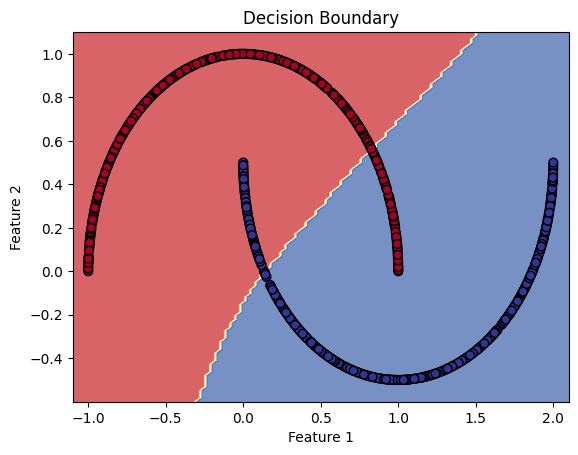

In [70]:


def plot_decision_boundary(model, X, y):
    # Move everything to CPU for compatibility
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Create feature tensor from meshgrid
    X_to_pred_on = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

    # Make predictions
    model.eval()
    with torch.no_grad():
        y_logits = model(X_to_pred_on)

    # Adjust logits to get prediction labels
    if y_logits.shape[1] > 1:  # Multi-class
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
    else:  # Binary
        y_pred = torch.round(torch.sigmoid(y_logits))

    # Reshape predictions to match meshgrid
    y_pred = y_pred.numpy().reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='k', s=40)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Boundary")
    plt.show()

# Now, plot the decision boundary
plot_decision_boundary(model_1, X_train, y_train)


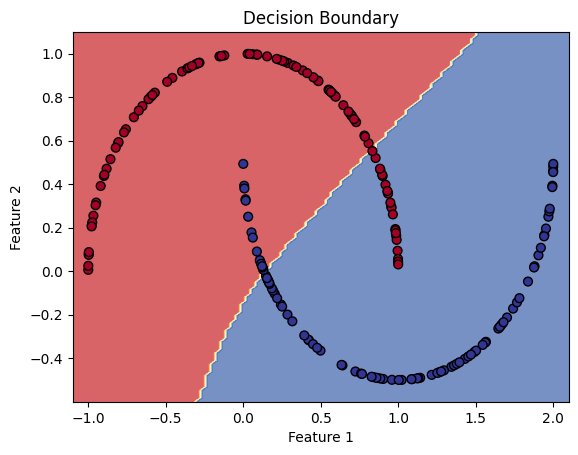

In [71]:
plot_decision_boundary(model_1, X_test, y_test)
